In [152]:
#Importa modelos
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

In [169]:
from sklearn.datasets import load_digits
digits = load_digits()

from sklearn.datasets import load_iris
iris = load_iris()

from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()

#escolhe dataset
dt = digits

In [170]:
#Ignorar
'''#Estes metodos servem para matrizes não binárias
#A fazer: um metodo que dado um elemento da matriz, transforma o "resto" da matriz toda em uma matriz binaria para melhor fazer a analise
def accuracy(matrix):
    trace = matrix.trace()
    total_sum = matrix.sum()
    accuracy = trace/total_sum
    return accuracy

def recall(matrix, element_index):
    return matrix[element_index][element_index]/matrix[element_index].sum()'''

'#Estes metodos servem para matrizes não binárias\n#A fazer: um metodo que dado um elemento da matriz, transforma o "resto" da matriz toda em uma matriz binaria para melhor fazer a analise\ndef accuracy(matrix):\n    trace = matrix.trace()\n    total_sum = matrix.sum()\n    accuracy = trace/total_sum\n    return accuracy\n\ndef recall(matrix, element_index):\n    return matrix[element_index][element_index]/matrix[element_index].sum()'

In [177]:
#stratifiedKFold = KFold que conserva a % de cada classe nos folds
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=5, shuffle=True)

from sklearn import metrics

#dicionário para armazenar os folds e as metricas de cada iteração
metrics_dict = {'Train Index' : [],
                'Test Index' : [],
                'Confusion Matrix' : [],
                'Accuracy' : [],
                'Error' : [],
                'Recall' : [],
                'Precision' : [],
                'MCC' : [],
                'F1' : [],
                'Kappa' : [],
                'ROC AUC' : []}

#Cria o modelo
#logistic_model = LogisticRegression(solver='liblinear', multi_class='ovr')
model = RandomForestClassifier()


for train_index, test_index in folds.split(dt.data,dt.target): #divide e faz a iteração entre as folds
    X_train, X_test, y_train, y_test = dt.data[train_index], dt.data[test_index], \
                                       dt.target[train_index], dt.target[test_index] #divide instancias e labels em train set e test set
    
    metrics_dict['Train Index'].append(train_index)
    metrics_dict['Test Index'].append(test_index)
    
    
    #Treina o modelo
    model.fit(X_train, y_train)

    #faz predição no test set
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)

    cm = confusion_matrix(y_test, y_pred)
    metrics_dict['Confusion Matrix'].append(cm)

    acc = metrics.accuracy_score(y_test, y_pred)
    metrics_dict['Accuracy'].append(acc)
    metrics_dict['Error'].append(1-acc)
    metrics_dict['Recall'].append(metrics.recall_score(y_test, y_pred, average='weighted')) #sensibilidade
    metrics_dict['Precision'].append(metrics.precision_score(y_test, y_pred, average='weighted')) 
    metrics_dict['MCC'].append(metrics.matthews_corrcoef(y_test, y_pred))
    metrics_dict['F1'].append(metrics.f1_score(y_test, y_pred, average='weighted'))
    metrics_dict['Kappa'].append(metrics.cohen_kappa_score(y_test, y_pred))
    metrics_dict['ROC AUC'].append(metrics.roc_auc_score(y_test, y_pred_prob, multi_class='ovr', average='weighted'))

In [180]:
folds

StratifiedKFold(n_splits=5, random_state=None, shuffle=True)

In [173]:
#Transformando o dicionário em um pandas dataframe e depois exportando como .csv
dataframe = pd.DataFrame.from_dict(metrics_dict)
dataframe.to_csv('metrics.csv', float_format='%.10f')
dataframe

,Train Index,Test Index,Confusion Matrix,Accuracy,Error,Recall,Precision,MCC,F1,Kappa,ROC AUC
0,"[1, 3, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16,...","[0, 2, 4, 9, 21, 22, 23, 24, 25, 35, 44, 54, 5...","[[36, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 36, 0, 0...",0.986111,0.013889,0.986111,0.986629,0.984643,0.986018,0.984567,0.999653
1,"[0, 1, 2, 3, 4, 5, 6, 7, 9, 11, 12, 14, 15, 18...","[8, 10, 13, 16, 17, 19, 40, 42, 43, 45, 46, 52...","[[36, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 36, 0, 0...",0.961111,0.038889,0.961111,0.961803,0.956943,0.960717,0.956788,0.999319
2,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 15,...","[11, 12, 31, 34, 37, 41, 47, 53, 61, 63, 65, 7...","[[35, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 36, 0, 0...",0.980501,0.019499,0.980501,0.980788,0.978376,0.980458,0.978333,0.999573
3,"[0, 2, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, ...","[1, 3, 7, 18, 20, 28, 29, 30, 32, 33, 38, 48, ...","[[34, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 37, 0, 0...",0.969359,0.030641,0.969359,0.971077,0.966178,0.969267,0.965953,0.999507
4,"[0, 1, 2, 3, 4, 7, 8, 9, 10, 11, 12, 13, 16, 1...","[5, 6, 14, 15, 26, 27, 36, 39, 49, 51, 55, 64,...","[[35, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 37, 0, 0...",0.972145,0.027855,0.972145,0.972515,0.969090,0.972140,0.969049,0.998909


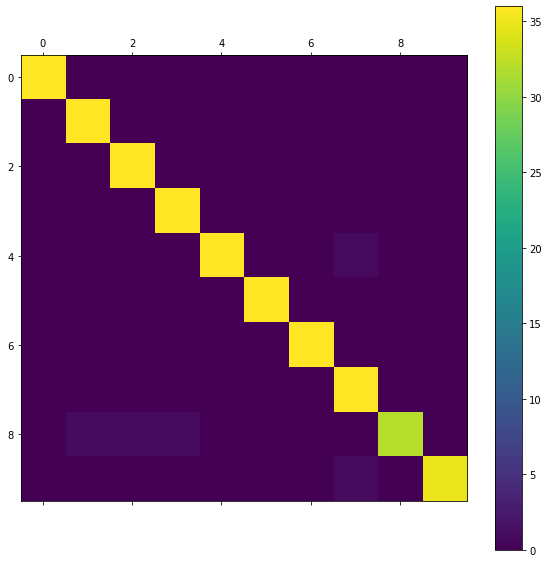

In [174]:
def plot_confusion_matrix(matrix):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

plot_confusion_matrix(dataframe['Confusion Matrix'][0])